In [1]:
import os
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import ticker
from PIL import Image 

## Ingresar escenario :

In [2]:
escen = 4 # 1, 4, 3 ,8

In [3]:
path = os.getcwd()
folder= path + "/dataset/series_boyas/tsE"+str(escen)+"/"
print(folder)

/home/jorge/tsunami-warning/dataset/series_boyas/tsE4/


<img src="L3_Vdat.png" alt="alt text" width="2000">


In [4]:
files = []
for file in os.listdir(folder):
    if file.endswith(".nc"):
        files.append(file)
files.sort()
print(files)

['layer01_tsE475.nc', 'layer01_tsE485.nc']


## Se visualiza la imagen con las boyas graficadas
Para tener un apoyo vizual de la ubicación de cada una de estas.

In [5]:
I = Image.open(path+"/dataset/boyas/L3_Vdat.png",'r')
I.show()

## Boyas Altura de ola e inundacion valpo-viña.

In [6]:
b_valpo = [11,28,32] # boyas altura de ola valpo

b_vina = [0,18,35] # boyas altura de ola viña

i_valpo = [2,6,9] # boyas altura de inundacion valpo

i_vina = [20,24,25] # boyas altura de inundacion viña

# diccionarios boyas mar e inundación
boyas = {'boyas Valparaiso':b_valpo,'boyas Viña':b_vina,'inundacion Valparaiso':i_valpo,'inundacion Viña':i_vina}

In [7]:
boyas

{'boyas Valparaiso': [11, 28, 32],
 'boyas Viña': [0, 18, 35],
 'inundacion Valparaiso': [2, 6, 9],
 'inundacion Viña': [20, 24, 25]}

In [8]:
for tipo_boya, boya in boyas.items():
    print(tipo_boya, ' ', boya)

boyas Valparaiso   [11, 28, 32]
boyas Viña   [0, 18, 35]
inundacion Valparaiso   [2, 6, 9]
inundacion Viña   [20, 24, 25]


## Gráficos series de tiempo.

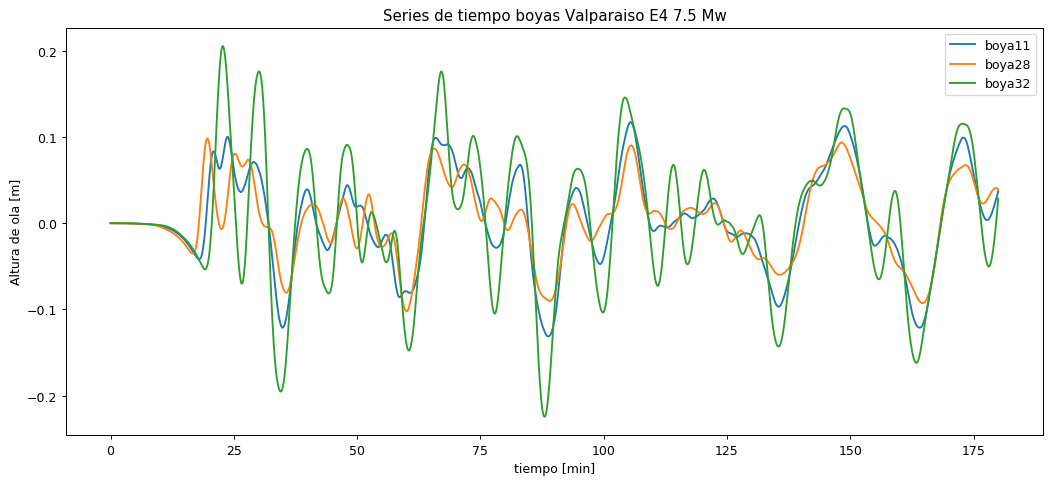

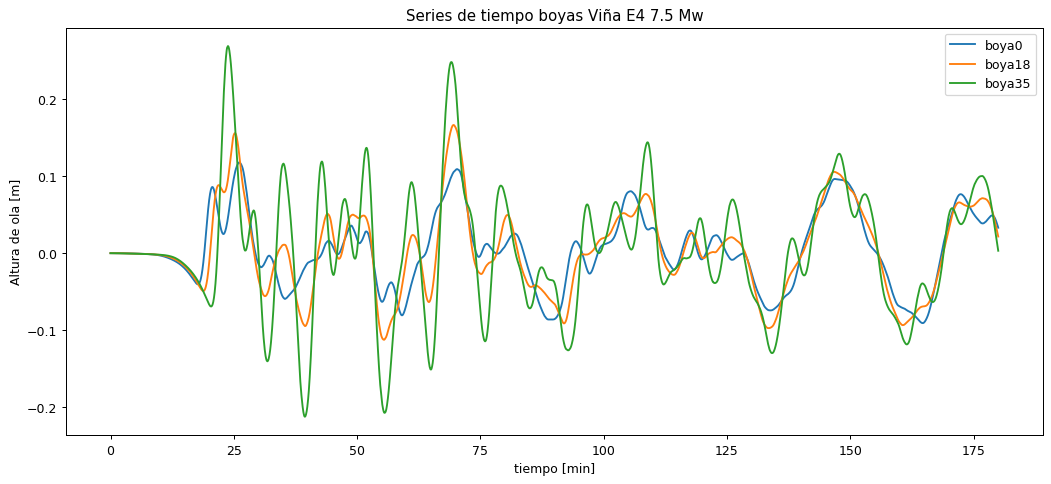

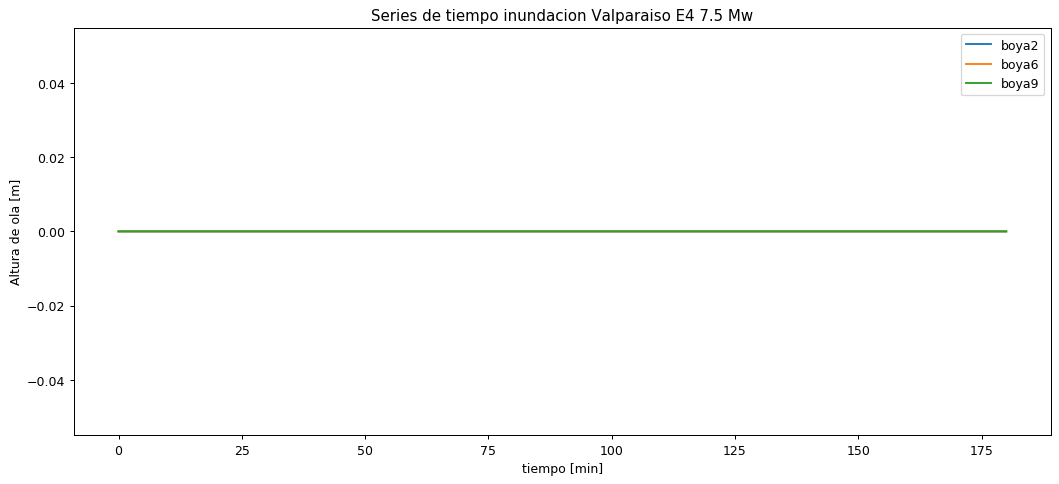

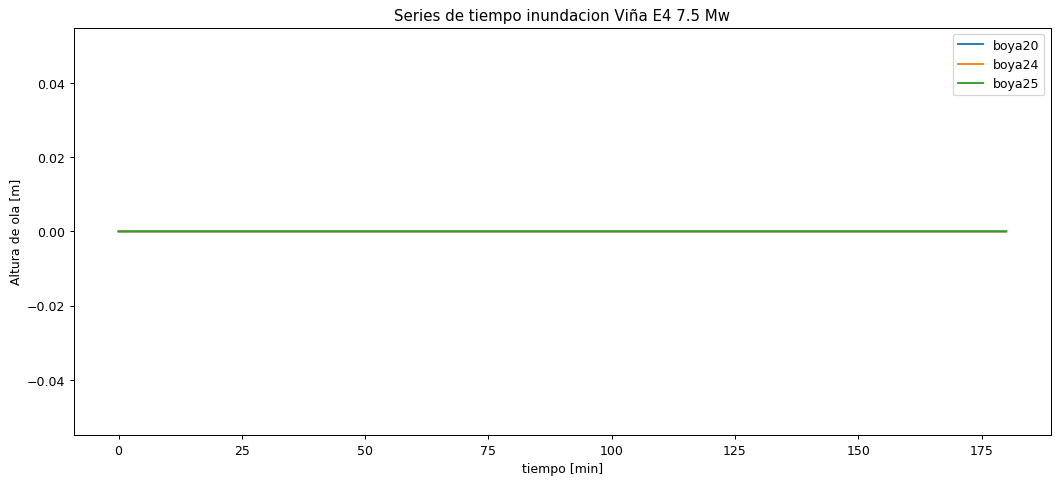

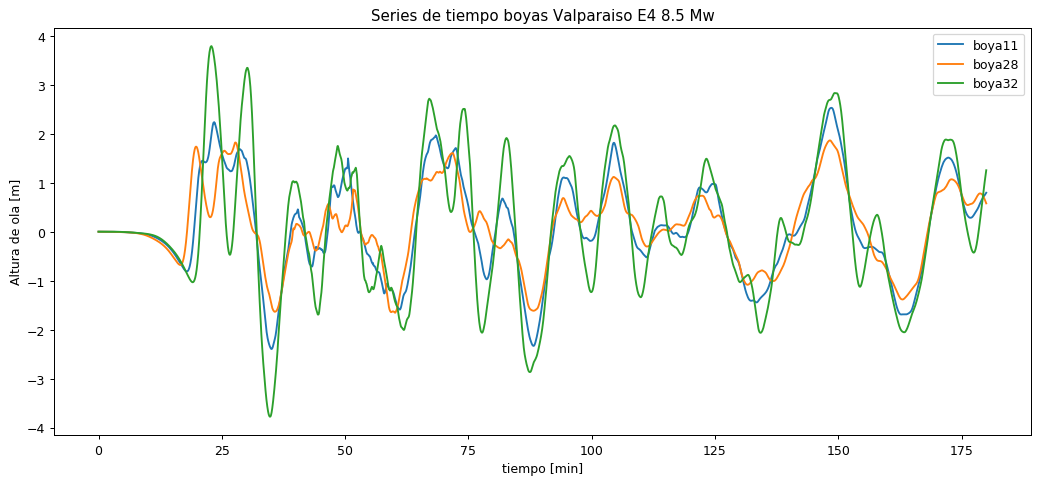

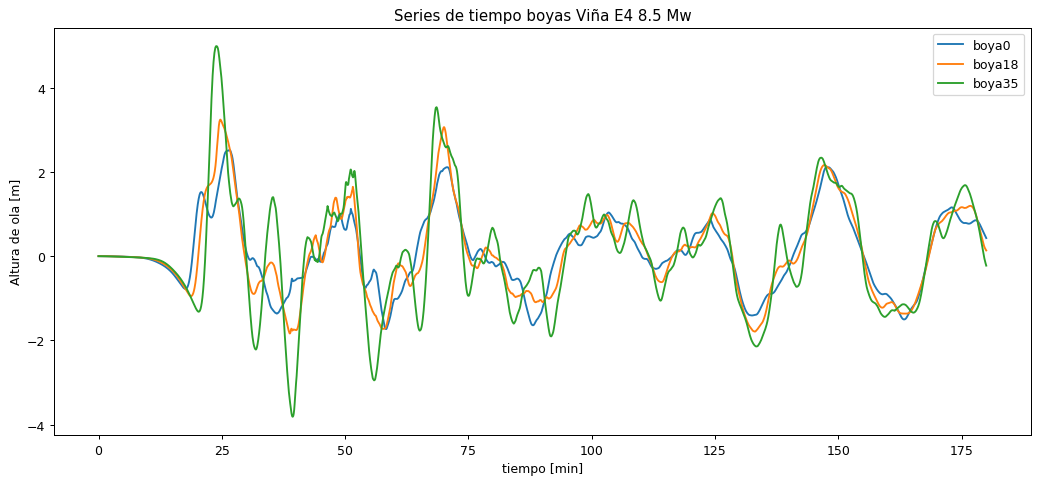

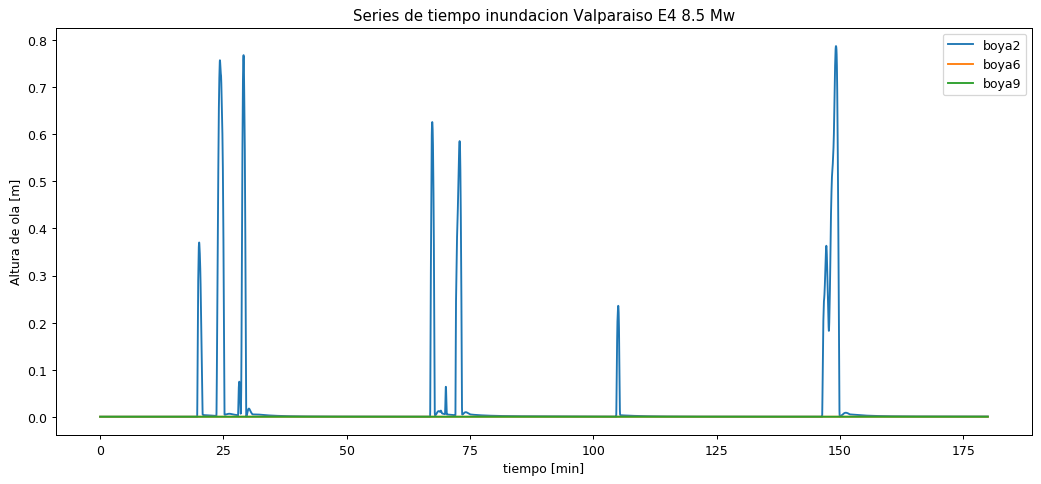

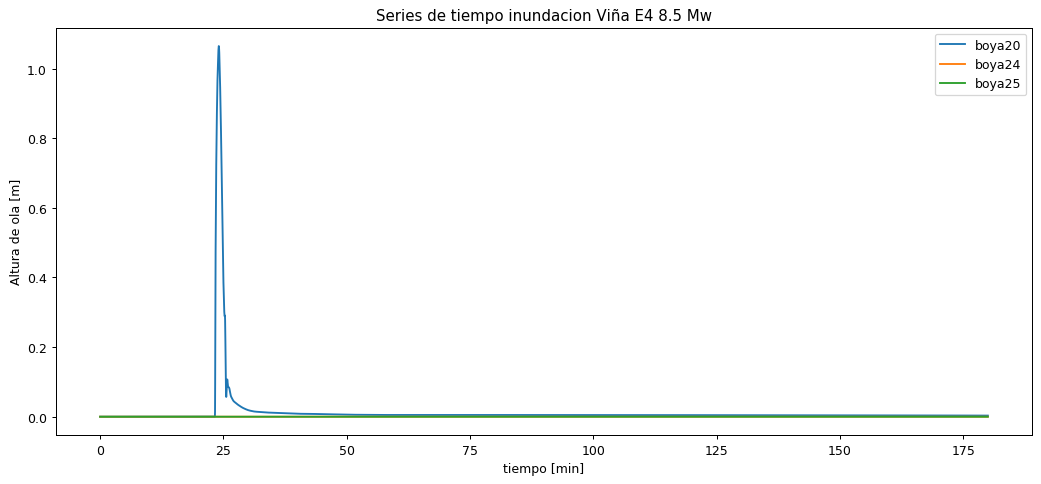

In [9]:
for file in files:
    rutafile = folder  + file
    f=Dataset(rutafile,'r') # abrir file
    for tipo_boya, boya in boyas.items():
        figure = plt.figure(figsize=(14,6), dpi=90)
        for i in boya:
            time = f.variables['time'][:]/60 
            eta = f.variables['eta'][:,i] -f.variables['eta'][:,i][0]# inundacion
            plt.plot(time,eta,label = 'boya'+str(i))
            plt.title('Series de tiempo '+tipo_boya +' '+ file[-7:-5] +' '+ file[-5]+'.'+file[-4]+' Mw')
            plt.ylabel('Altura de ola [m]')
            plt.ylabel('Altura de ola [m]')
            plt.xlabel('tiempo [min]')
            plt.legend(loc='upper right')
            folderout = folder+ tipo_boya
            if not os.path.exists(folderout): # crea folder si no existe
                os.makedirs(folderout)

            figure.savefig(folderout+'/'+file.split('.nc')[0]+'.png',
                           dpi=300,bbox_inches = 'tight',pad_inches = 0)
        plt.show()